<a href="https://colab.research.google.com/github/Pallavi-Bhaskar/Machine-Learning/blob/main/Classifying_Digital_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving digital_letters.csv to digital_letters.csv


In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv('digital_letters.csv')
display(data)
Name=sorted(data['label'].unique().tolist())
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 
data['label']=data['label'].map(normal_mapping)
print(normal_mapping)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,13125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V
13126,13126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
13127,13127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
13128,13128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [7]:
m=len(data)
M=list(range(m))
random.seed(2021)
random.shuffle(M)
dataX=data.iloc[:,1:-1]
dataY=data.iloc[:,-1]
trainX=dataX.iloc[M[0:(m//4)*3]]
trainY=dataY.iloc[M[0:(m//4)*3]]
testX=dataX.iloc[M[(m//4)*3:]]
testY=dataY.iloc[M[(m//4)*3:]]

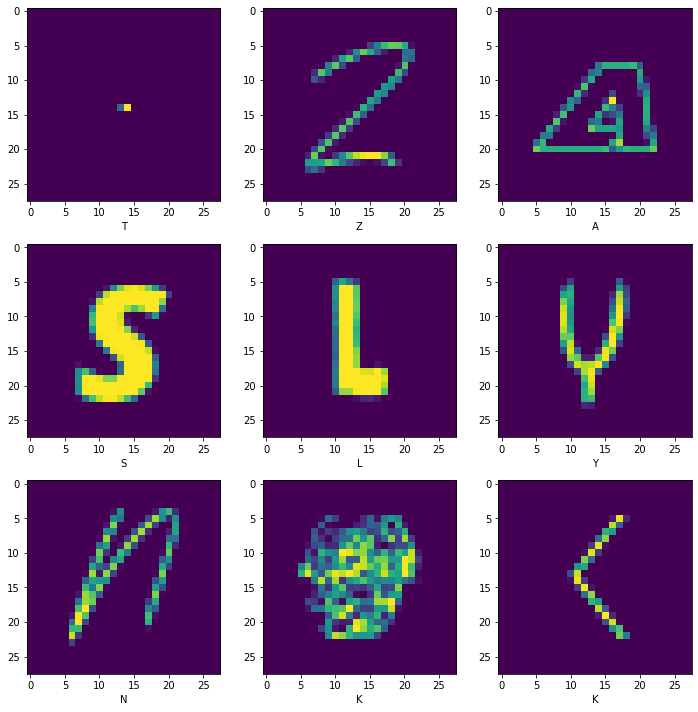

In [8]:
trainX=np.array(trainX).reshape(-1,28,28,1)
testX=np.array(testX).reshape(-1,28,28,1)
trainY=np.array(trainY)
testY=np.array(testY)

X_images = trainX.reshape(-1,28,28)
plt.subplots(3,3, figsize=(10,10))
for i in range(9):
    arr = X_images[i]
    plt.subplot(3,3, i+1)
    plt.xlabel(reverse_mapping[trainY[i]])
    plt.imshow(arr)
plt.tight_layout()
plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(104, activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [11]:
binencoder = LabelBinarizer()
trainYE = binencoder.fit_transform(trainY)
display(trainYE)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
result = model.fit(trainX, trainYE, validation_split=0.2, epochs=50, batch_size=92, verbose=2)
result

Epoch 1/50
86/86 - 7s - loss: 4.5715 - accuracy: 0.0799 - val_loss: 2.7161 - val_accuracy: 0.2025 - 7s/epoch - 84ms/step
Epoch 2/50
86/86 - 6s - loss: 2.4184 - accuracy: 0.3029 - val_loss: 1.7995 - val_accuracy: 0.5223 - 6s/epoch - 68ms/step
Epoch 3/50
86/86 - 6s - loss: 1.5901 - accuracy: 0.5750 - val_loss: 1.2927 - val_accuracy: 0.6497 - 6s/epoch - 68ms/step
Epoch 4/50
86/86 - 6s - loss: 1.2378 - accuracy: 0.6628 - val_loss: 1.0827 - val_accuracy: 0.7020 - 6s/epoch - 74ms/step
Epoch 5/50
86/86 - 6s - loss: 1.0575 - accuracy: 0.7045 - val_loss: 1.0084 - val_accuracy: 0.7183 - 6s/epoch - 71ms/step
Epoch 6/50
86/86 - 6s - loss: 0.9491 - accuracy: 0.7302 - val_loss: 0.9560 - val_accuracy: 0.7350 - 6s/epoch - 74ms/step
Epoch 7/50
86/86 - 6s - loss: 0.8427 - accuracy: 0.7567 - val_loss: 0.9327 - val_accuracy: 0.7482 - 6s/epoch - 71ms/step
Epoch 8/50
86/86 - 6s - loss: 0.7729 - accuracy: 0.7743 - val_loss: 0.8664 - val_accuracy: 0.7650 - 6s/epoch - 70ms/step
Epoch 9/50
86/86 - 6s - loss: 0.

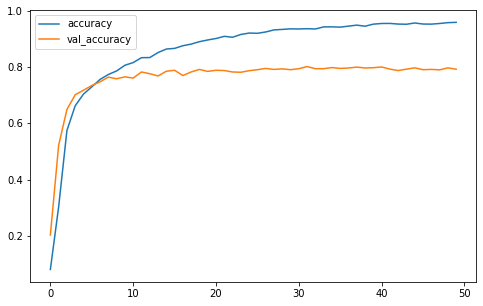

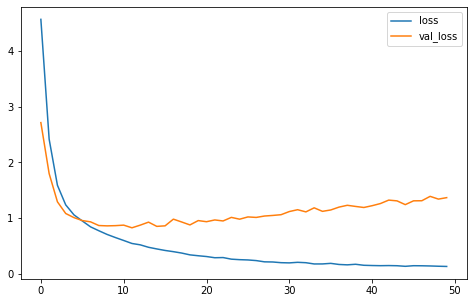

In [13]:
history = pd.DataFrame(result.history)
history.loc[:,['accuracy','val_accuracy']].plot(figsize=(8,5))
history.loc[:,['loss','val_loss']].plot(figsize=(8,5))

In [14]:
pred = model.predict(testX)

pred2=[]
for item in pred:
    pred2+=[np.argmax(item)]
    
from sklearn.metrics import classification_report
print(classification_report(testY,pred2,target_names=Name))

              precision    recall  f1-score   support

           A       0.80      0.79      0.79       135
           B       0.71      0.79      0.75       112
           C       0.78      0.83      0.81       118
           D       0.66      0.85      0.74       121
           E       0.82      0.75      0.79       142
           F       0.82      0.89      0.85       135
           G       0.89      0.78      0.83       108
           H       0.85      0.77      0.81       128
           I       0.82      0.71      0.76       126
           J       0.80      0.75      0.78       130
           K       0.82      0.74      0.78       133
           L       0.83      0.89      0.85       123
           M       0.74      0.75      0.74       114
           N       0.68      0.76      0.72       128
           O       0.76      0.71      0.74       136
           P       0.85      0.85      0.85       124
           Q       0.86      0.72      0.79       123
           R       0.78    